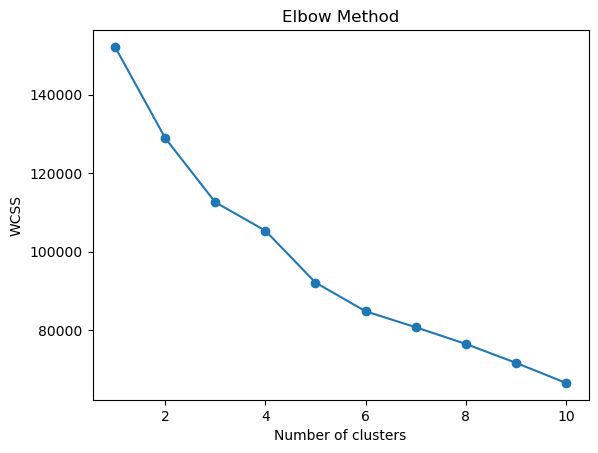

Cluster
3    3370
2    3119
1    1491
0     970
Name: count, dtype: int64


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/Admin/Desktop/Ram_Datamininig/Chapter6/CC GENERAL.csv")

# Drop non-numeric and missing data
df = df.drop(['CUST_ID'], axis=1)
df = df.fillna(df.mean())

# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Elbow method to find optimal clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Build final model (choose k, e.g., 4 from elbow)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters
print(df['Cluster'].value_counts())
